# Exploratory Data Analysis with US Major banks' stock price





This project is attempt to practice visualization and python library for EDA purpose, it is not meant to be a robust financial analysis or be taken as financial advice.
I'll focus on bank stocks and see how they progressed throughout the financial crisis all the way to early 2017. Below banks are the targets of analysis

*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo


In [ ]:
## Data import

I will use pandas to directly read data from Yahoo finance using pandas datareader
#!pip install pandas-datareader
#!pip install --upgrade pandas
import pandas as pd
import numpy as np
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data, wb

import datetime
%matplotlib inline

## Data Extraction

Fetching stock data from yahoo finance from 2000 to 2018 and Constructing a separate dataframe for each bank using their tickers 

In [233]:
start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2020, 6, 30)

# Bank of America
BAC = data.DataReader("BAC", 'yahoo', start, end)

# CitiGroup
C = data.DataReader("C", 'yahoo', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'yahoo', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'yahoo', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'yahoo', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'yahoo', start, end)

Master table containing all the target banks

In [234]:
df = data.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'],'yahoo', start, end)
df

Attributes  Adj Close                                                \
Symbols           BAC          C          GS         JPM         MS   
Date                                                                  
2018-01-02  28.327543  69.533264  244.074509   99.667267  48.864182   
2018-01-03  28.232800  69.748337  241.802444   99.768829  48.995262   
2018-01-04  28.602287  70.608627  245.181931  101.198090  49.744282   
2018-01-05  28.734924  70.515114  243.931305  100.548431  49.725548   
2018-01-08  28.535971  69.692230  240.389572  100.696907  49.519577   
...               ...        ...         ...         ...        ...   
2020-06-24  23.809999  50.810001  198.020004   93.746490  46.950001   
2020-06-25  24.719999  52.680000  207.100006   97.014641  48.790001   
2020-06-26  23.150000  49.580002  189.190002   91.696457  47.049999   
2020-06-29  23.389999  50.290001  193.470001   92.102509  47.240002   
2020-06-30  23.750000  51.099998  197.619995   93.152275  48.299999   

Attributes                 Close                                     ...  \
Symbols           WFC        BAC          C          GS         JPM  ...   
Date                                                                 ...   
2018-01-02  55.337929  29.900000  74.360001  255.669998  107.949997  ...   
2018-01-03  55.763680  29.799999  74.589996  253.289993  108.059998  ...   
2018-01-04  56.461178  30.190001  75.510002  256.829987  109.040001  ...   
2018-01-05  56.841637  30.330000  75.410004  255.520004  108.339996  ...   
2018-01-08  56.198483  30.120001  74.529999  251.809998  108.500000  ...   
...               ...        ...        ...         ...         ...  ...   
2020-06-24  26.120001  23.809999  50.810001  198.020004   94.660004  ...   
2020-06-25  27.370001  24.719999  52.680000  207.100006   97.959999  ...   
2020-06-26  25.340000  23.150000  49.580002  189.190002   92.589996  ...   
2020-06-29  25.700001  23.389999  50.290001  193.470001   93.000000  ...   
2020-06-30  25.600000  23.750000  51.099998  197.619995   94.059998  ...   

Attributes        Open                                         Volume  \
Symbols             GS         JPM         MS        WFC          BAC   
Date                                                                    
2018-01-02  257.769989  107.629997  52.759998  61.040001   57121600.0   
2018-01-03  255.479996  107.860001  52.299999  61.220001   57865700.0   
2018-01-04  255.229996  108.360001  52.799999  61.980000   76512500.0   
2018-01-05  257.179993  109.260002  53.200001  62.759998   56445200.0   
2018-01-08  254.750000  108.150002  52.930000  62.660000   42914800.0   
...                ...         ...        ...        ...          ...   
2020-06-24  202.339996   96.750000  47.590000  26.959999   75437100.0   
2020-06-25  197.860001   94.349998  46.709999  25.959999   65031900.0   
2020-06-26  199.000000   95.110001  48.299999  26.100000  118139200.0   
2020-06-29  191.380005   93.400002  47.570000  25.590000   66269200.0   
2020-06-30  193.839996   92.830002  47.060001  25.209999   61716200.0   

Attributes                                                             
Symbols              C         GS         JPM          MS         WFC  
Date                                                                   
2018-01-02  15819800.0  2258300.0  13578800.0   6644600.0  13819300.0  
2018-01-03  14657900.0  2988200.0  11901000.0   6955500.0  14203700.0  
2018-01-04  16864900.0  2583200.0  12953700.0   8678800.0  18740500.0  
2018-01-05  15300500.0  2594700.0  14155000.0   6476000.0  14217900.0  
2018-01-08  14215700.0  2940500.0  12466500.0   6681400.0  15569400.0  
...                ...        ...         ...         ...         ...  
2020-06-24  27207700.0  2756700.0  22919800.0  12806200.0  57380900.0  
2020-06-25  28112400.0  3466500.0  25743600.0  15014300.0  45102200.0  
2020-06-26  35426200.0  9530700.0  41896300.0  20082500.0  81172300.0  
2020-06-29  22578600.0  3736000.0  18499700.0   93808

Assigning each bank's name to respect data table

In [235]:
BAC["Company"]='BOA'
C["Company"]='Citi'
GS["Company"]='GoldmanSachs'
JPM["Company"]='JPMorgan'
MS["Company"]='MorganStanley'
WFC["Company"]='WellsFargo'

In [236]:
df.head()

Attributes  Adj Close                                                \
Symbols           BAC          C          GS         JPM         MS   
Date                                                                  
2018-01-02  28.327543  69.533264  244.074509   99.667267  48.864182   
2018-01-03  28.232800  69.748337  241.802444   99.768829  48.995262   
2018-01-04  28.602287  70.608627  245.181931  101.198090  49.744282   
2018-01-05  28.734924  70.515114  243.931305  100.548431  49.725548   
2018-01-08  28.535971  69.692230  240.389572  100.696907  49.519577   

Attributes                 Close                                     ...  \
Symbols           WFC        BAC          C          GS         JPM  ...   
Date                                                                 ...   
2018-01-02  55.337929  29.900000  74.360001  255.669998  107.949997  ...   
2018-01-03  55.763680  29.799999  74.589996  253.289993  108.059998  ...   
2018-01-04  56.461178  30.190001  75.510002  256.829987  109.040001  ...   
2018-01-05  56.841637  30.330000  75.410004  255.520004  108.339996  ...   
2018-01-08  56.198483  30.120001  74.529999  251.809998  108.500000  ...   

Attributes        Open                                        Volume  \
Symbols             GS         JPM         MS        WFC         BAC   
Date                                                                   
2018-01-02  257.769989  107.629997  52.759998  61.040001  57121600.0   
2018-01-03  255.479996  107.860001  52.299999  61.220001  57865700.0   
2018-01-04  255.229996  108.360001  52.799999  61.980000  76512500.0   
2018-01-05  257.179993  109.260002  53.200001  62.759998  56445200.0   
2018-01-08  254.750000  108.150002  52.930000  62.660000  42914800.0   

Attributes                                                            
Symbols              C         GS         JPM         MS         WFC  
Date                                                                  
2018-01-02  15819800.0  2258300.0  13578800.0  6644600.0  13819300.0  
2018-01-03  14657900.0  2988200.0  11901000.0  6955500.0  14203700.0  
2018-01-04  16864900.0  2583200.0  12953700.0  8678800.0  18740500.0  
2018-01-05  15300500.0  2594700.0  14155000.0  6476000.0  14217900.0  
2018-01-08  14215700.0  2940500.0  12466500.0  6681400.0  15569400.0  

[5 rows x 36 columns]

#### Closing prices of BAC

In [237]:
BAC

,High,Low,Open,Close,Volume,Adj Close,Company
Date,,,,,,,
2018-01-02,29.900000,29.610001,29.750000,29.900000,57121600.0,28.327543,BOA
2018-01-03,29.940001,29.690001,29.900000,29.799999,57865700.0,28.232800,BOA
2018-01-04,30.440001,29.879999,29.969999,30.190001,76512500.0,28.602287,BOA
2018-01-05,30.420000,30.049999,30.370001,30.330000,56445200.0,28.734924,BOA
2018-01-08,30.270000,30.049999,30.230000,30.120001,42914800.0,28.535971,BOA
...,...,...,...,...,...,...,...
2020-06-24,24.540001,23.680000,24.540001,23.809999,75437100.0,23.809999,BOA
2020-06-25,24.770000,23.549999,23.700001,24.719999,65031900.0,24.719999,BOA
2020-06-26,24.110001,23.020000,24.090000,23.150000,118139200.0,23.150000,BOA


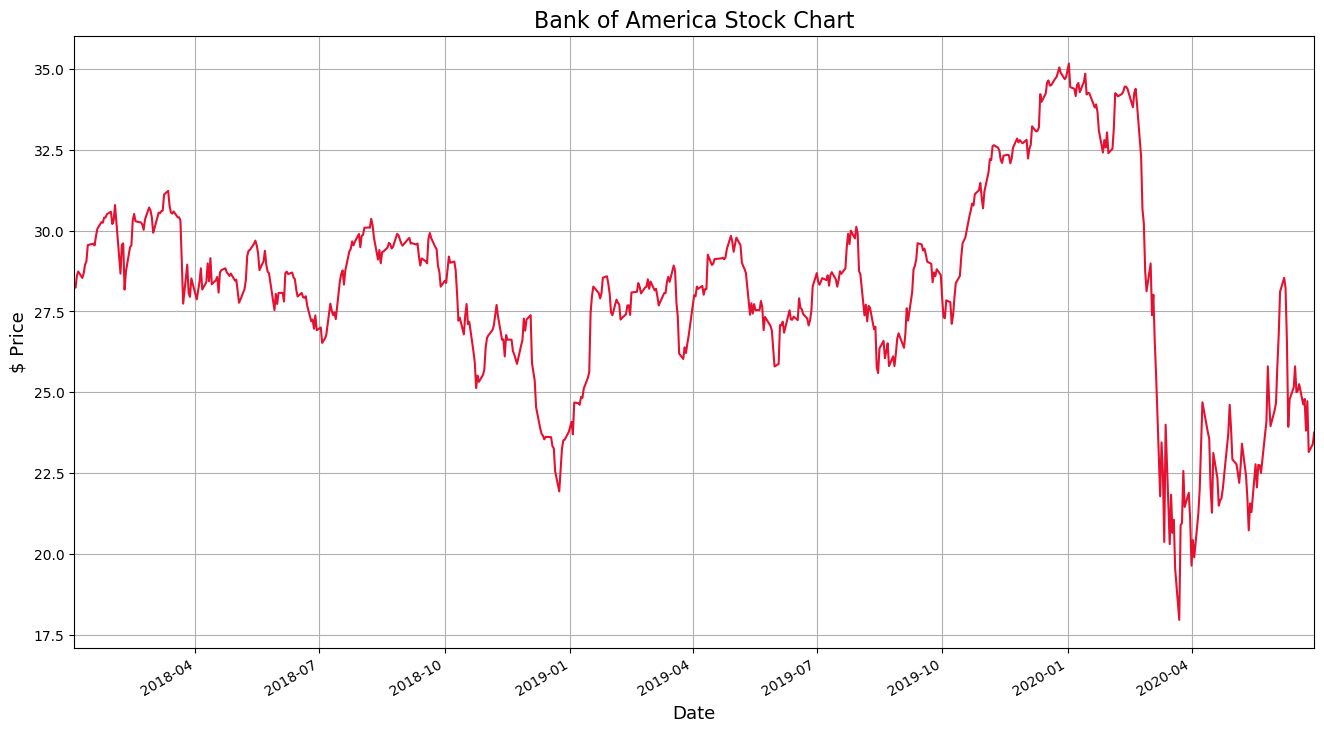

In [238]:
import matplotlib.pyplot as plt

plt.ylabel("$ Price", fontsize =13)
plt.xlabel('Date', fontsize =13)
plt.title('Bank of America Stock Chart', fontsize = 16)
BAC['Adj Close'].plot(figsize=(16,9), grid=True, color ='#e61030')


### Appending all the data sets

In [239]:
#1. combining 'close' price of each bank
closing_prices = pd.DataFrame(
    {'BAC': df['Adj Close']['BAC'],
     'C': df['Adj Close']['C'],
     'GS': df['Adj Close']['GS'],
     'JPM': df['Adj Close']['JPM'],
     'MS': df['Adj Close']['MS'],
     'WFC':df['Adj Close']['WFC']
    })
closing_prices

,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2018-01-02,28.327543,69.533264,244.074509,99.667267,48.864182,55.337929
2018-01-03,28.232800,69.748337,241.802444,99.768829,48.995262,55.763680
2018-01-04,28.602287,70.608627,245.181931,101.198090,49.744282,56.461178
2018-01-05,28.734924,70.515114,243.931305,100.548431,49.725548,56.841637
2018-01-08,28.535971,69.692230,240.389572,100.696907,49.519577,56.198483
...,...,...,...,...,...,...
2020-06-24,23.809999,50.810001,198.020004,93.746490,46.950001,26.120001
2020-06-25,24.719999,52.680000,207.100006,97.014641,48.790001,27.370001
2020-06-26,23.150000,49.580002,189.190002,91.696457,47.049999,25.340000


In [240]:
#2. combining full dataset of each bank vertically (stacking up)
allbank = pd.concat([BAC,C,GS,JPM,MS,WFC], axis =0)
allbank

,High,Low,Open,Close,Volume,Adj Close,Company
Date,,,,,,,
2018-01-02,29.900000,29.610001,29.750000,29.900000,57121600.0,28.327543,BOA
2018-01-03,29.940001,29.690001,29.900000,29.799999,57865700.0,28.232800,BOA
2018-01-04,30.440001,29.879999,29.969999,30.190001,76512500.0,28.602287,BOA
2018-01-05,30.420000,30.049999,30.370001,30.330000,56445200.0,28.734924,BOA
2018-01-08,30.270000,30.049999,30.230000,30.120001,42914800.0,28.535971,BOA
...,...,...,...,...,...,...,...
2020-06-24,27.030001,25.990000,26.959999,26.120001,57380900.0,26.120001,WellsFargo
2020-06-25,27.410000,25.889999,25.959999,27.370001,45102200.0,27.370001,WellsFargo
2020-06-26,26.400000,25.250000,26.100000,25.340000,81172300.0,25.340000,WellsFargo


### Deriving the average closing price for each bank

In [275]:
avg_closing = allbank.groupby('Company')['Adj Close'].mean()
avg_closing

Company
BOA               28.173022
Citi              63.918662
GoldmanSachs     209.032214
JPMorgan         106.574740
MorganStanley     44.951288
WellsFargo        45.780220
Name: Adj Close, dtype: float64

##### Plot the average closing price for each bank using matplotlib or plotly and cufflinks


In [ ]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt

Text(0.5, 0, 'Banks')

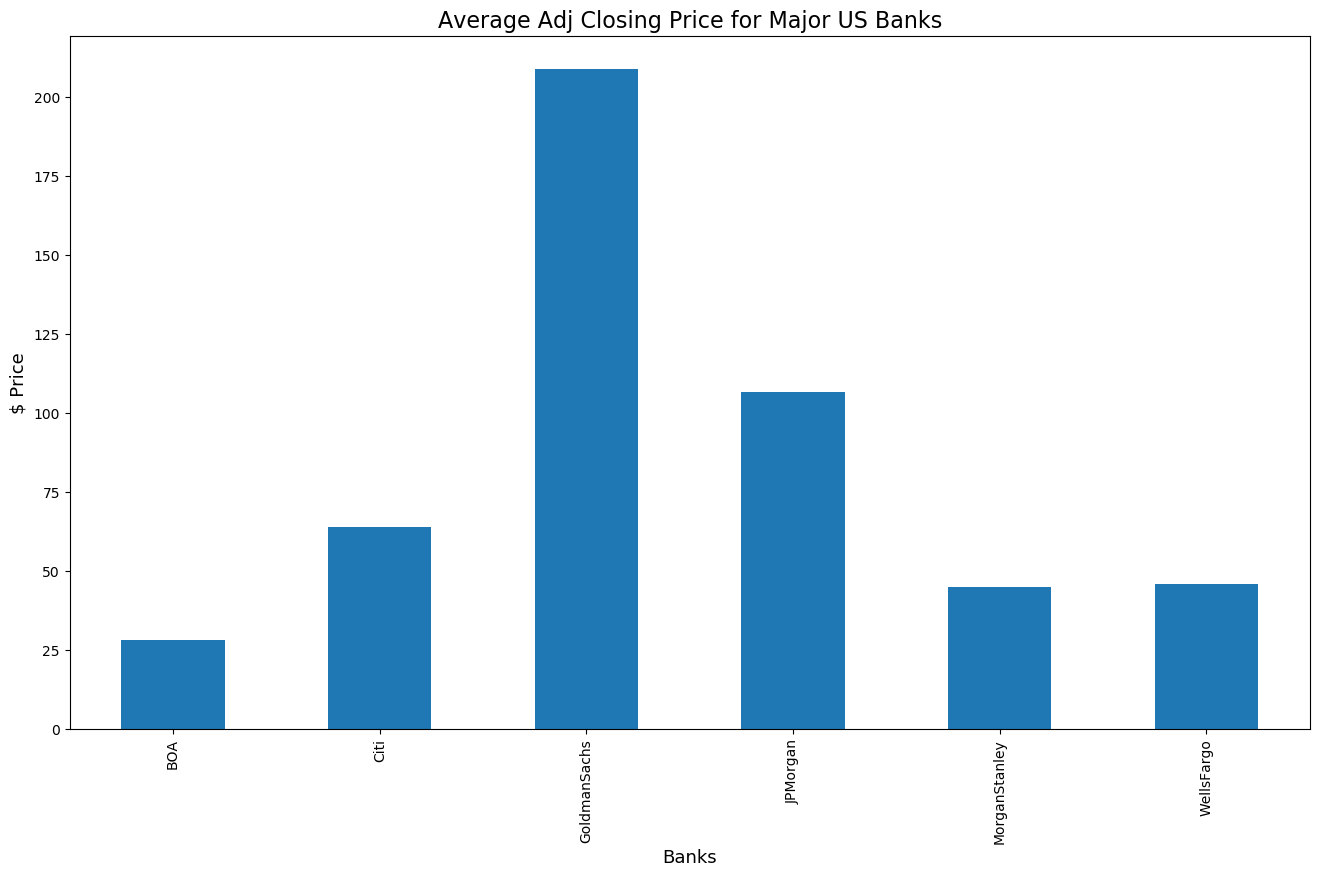

In [243]:
plt.ylabel("$ Price", fontsize ='13')
plt.title('Average Adj Closing Price for Major US Banks', fontsize = 16)
avg_closing.plot(figsize=(16,9), kind='bar')
plt.xlabel('Banks', fontsize='13', horizontalalignment='center')


Getting the max Close price for each bank's stock throughout the time period

In [274]:
max_closing = allbank.groupby('Company')['Adj Close'].max()
max_closing

Company
BOA               35.168762
Citi              80.515900
GoldmanSachs     261.713928
JPMorgan         137.409225
MorganStanley     56.636719
WellsFargo        59.722210
Name: Adj Close, dtype: float64

### Returns

This dataframe will contain the returns for each bank's stock. Returns are typically defined as below

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

Directly applying the foruma:

In [245]:
returns = (df['Adj Close'] / df['Adj Close'].shift(1)) - 1
"""
Alternatively,
returns_df = df['Close'].pct_change() 
will give the same result
"""
returns

Symbols,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,-0.003345,0.003093,-0.009309,0.001019,0.002683,0.007694
2018-01-04,0.013087,0.012334,0.013976,0.014326,0.015288,0.012508
2018-01-05,0.004637,-0.001324,-0.005101,-0.006420,-0.000377,0.006738
2018-01-08,-0.006924,-0.011670,-0.014519,0.001477,-0.004142,-0.011315
...,...,...,...,...,...,...
2020-06-24,-0.039532,-0.040415,-0.033011,-0.033391,-0.019628,-0.040764
2020-06-25,0.038219,0.036804,0.045854,0.034862,0.039191,0.047856
2020-06-26,-0.063511,-0.058846,-0.086480,-0.054818,-0.035663,-0.074169


Alternatively, pandas pct_change() can be used on the Close column to create a new dataframe representing this return value

In [273]:
allbank['AdjClose%Change'] = allbank.groupby(['Company'])['Adj Close'].pct_change()*100
allbank

,High,Low,Open,Close,Volume,Adj Close,Company,AdjClose%Change
Date,,,,,,,,
2018-01-02,29.900000,29.610001,29.750000,29.900000,57121600.0,28.327543,BOA,NaN
2018-01-03,29.940001,29.690001,29.900000,29.799999,57865700.0,28.232800,BOA,-0.334458
2018-01-04,30.440001,29.879999,29.969999,30.190001,76512500.0,28.602287,BOA,1.308718
2018-01-05,30.420000,30.049999,30.370001,30.330000,56445200.0,28.734924,BOA,0.463729
2018-01-08,30.270000,30.049999,30.230000,30.120001,42914800.0,28.535971,BOA,-0.692376
...,...,...,...,...,...,...,...,...
2020-06-24,27.030001,25.990000,26.959999,26.120001,57380900.0,26.120001,WellsFargo,-4.076382
2020-06-25,27.410000,25.889999,25.959999,27.370001,45102200.0,27.370001,WellsFargo,4.785605
2020-06-26,26.400000,25.250000,26.100000,25.340000,81172300.0,25.340000,WellsFargo,-7.416882


### Best Return and Worst Return Day

#### Best day return : Best Performance Date

In [247]:
returns.idxmax()

Symbols
BAC   2020-03-13
C     2020-03-13
GS    2020-03-13
JPM   2020-03-13
MS    2020-03-13
WFC   2020-03-24
dtype: datetime64[ns]

#### Best day return: Best daily return performance

In [248]:
returns.max()

Symbols
BAC    0.177962
C      0.179843
GS     0.175803
JPM    0.180125
MS     0.197700
WFC    0.145346
dtype: float64

Combining above info in a dataframe

In [249]:
bestday_df = pd.DataFrame([returns.idxmax()]).transpose().reset_index()
bestday2_df = pd.DataFrame([returns.max()]).transpose().reset_index()
bestday = pd.merge(bestday_df,bestday2_df, on = 'Symbols')
bestday =bestday.rename(columns={"0_x": "BestDay", "0_y": "DailyReturn", })
bestday

,Symbols,BestDay,DailyReturn
0,BAC,2020-03-13,0.177962
1,C,2020-03-13,0.179843
2,GS,2020-03-13,0.175803
3,JPM,2020-03-13,0.180125
4,MS,2020-03-13,0.197700
5,WFC,2020-03-24,0.145346


Banks excluding Wellsfargo recorded appx. 18% increased on the day of 13th March, 2020

#### Worst day return : Worse Daily Return Performance Date for each stock

In [250]:
returns.idxmin()

Symbols
BAC   2020-03-16
C     2020-03-16
GS    2020-03-16
JPM   2020-03-16
MS    2020-03-16
WFC   2020-03-12
dtype: datetime64[ns]

#### Worst day return: Worst daily return performance

In [251]:
returns.min()

Symbols
BAC   -0.153974
C     -0.192986
GS    -0.127053
JPM   -0.149649
MS    -0.156000
WFC   -0.158676
dtype: float64

In [272]:
worstday_df = pd.DataFrame([returns.idxmin()]).transpose().reset_index()
worstday2_df = pd.DataFrame([returns.min()]).transpose().reset_index()
worstday = pd.merge(worstday_df,worstday2_df, on = 'Symbols')
worstday =worstday.rename(columns={"0_x": "WorstDay", "0_y": "DailyReturn", })
worstday

,Symbols,WorstDay,DailyReturn
0,BAC,2020-03-16,-0.153974
1,C,2020-03-16,-0.192986
2,GS,2020-03-16,-0.127053
3,JPM,2020-03-16,-0.149649
4,MS,2020-03-16,-0.156000
5,WFC,2020-03-12,-0.158676


# A week of bests and worsts

In [276]:
ClosingReturn = pd.merge(df['Adj Close'],returns,on='Date', how='left')


In [302]:
ClosingReturn =ClosingReturn.rename(columns={"BAC_x": "BAC_AdjClosing", "BAC_y": "BAC_Return", "C_x": "C_AdjClosing", "C_y": "C_Return", "GS_x": "GS_AdjClosing", "GS_y": "GS_Return", "JPM_x": "JPM_AdjClosing", "JPM_y": "JPM_Return", "MS_x": "MS_AdjClosing", "MS_y": "MS_Return", "WFC_x": "WFC_AdjClosing", "WFC_y": "WFC_Return"})

#### Plotting Bank of America Adj. Closing price and returns for the period of interest (Period inlcluding the best day and the worst day)

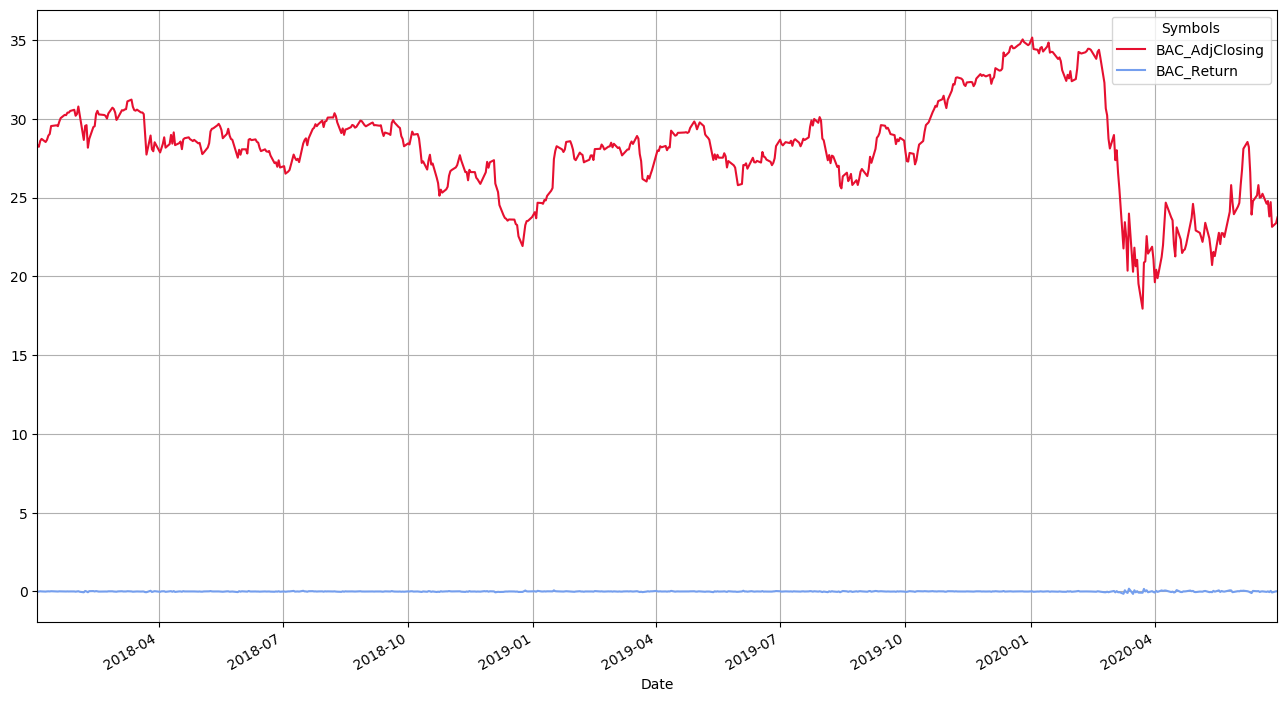

In [279]:
ClosingReturn.plot(y = ['BAC_AdjClosing', "BAC_Return"], figsize = (16,9), grid=True, color =['#e61030', '#759FEE'])

This is not really readable as return and price are plotted on the same axis. So I'll have a separate y-axis for returns as below

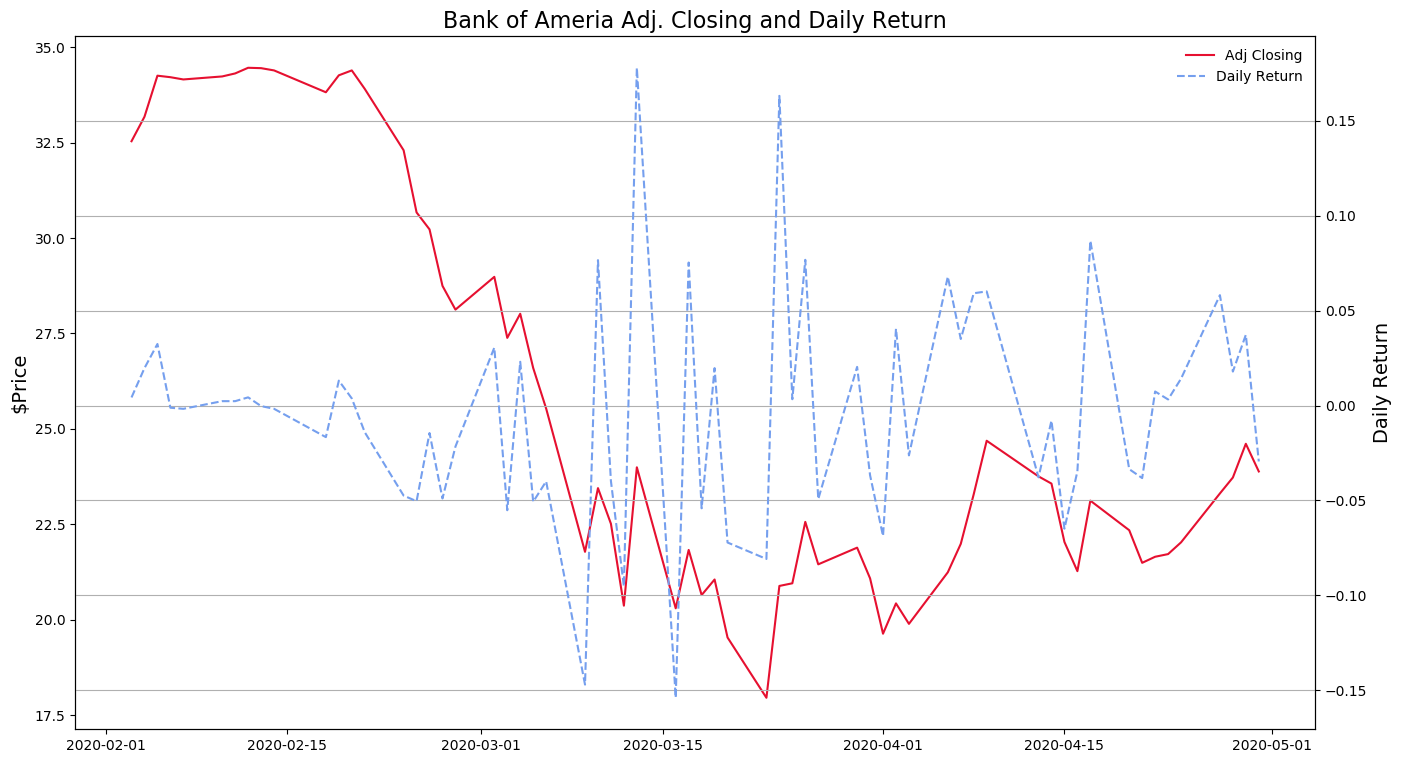

In [319]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(16,9))

#fig= plt.figure(figsize=(16,9))

ax.plot(ClosingReturn['2020-02-01':'2020-04-30'].BAC_AdjClosing, color='#e61030')

ax.set_ylabel("$Price",fontsize=14)

ax.legend(['Adj Closing'], loc=1, frameon=False)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(ClosingReturn['2020-02-01':'2020-04-30'].BAC_Return, color='#759FEE', linestyle='--')
ax2.set_ylabel("Daily Return", fontsize=14)
ax2.legend(['Daily Return'], loc=1, bbox_to_anchor=(1, 0.97,0 ,0 ), frameon = False)

ax2.grid(True)
plt.title("Bank of Ameria Adj. Closing and Daily Return", size = 16)
plt.show()


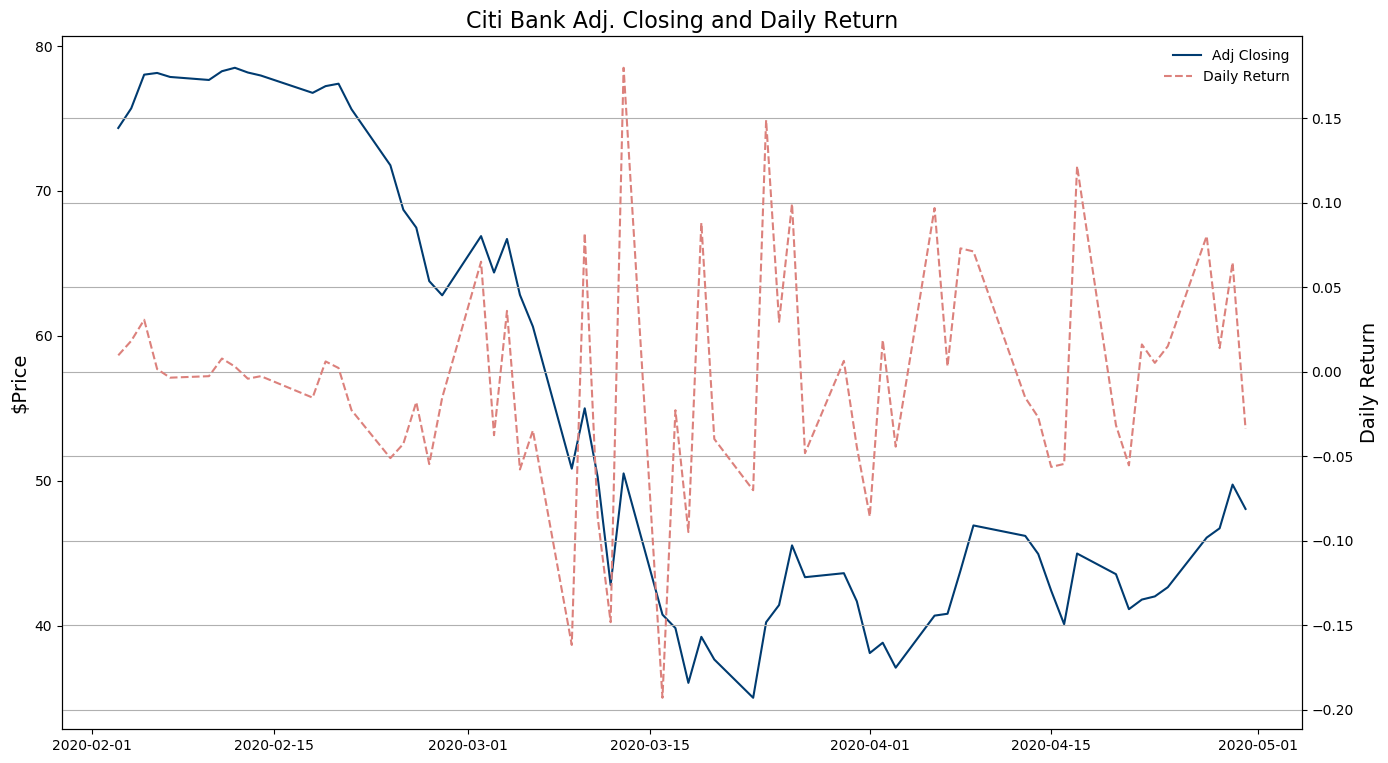

In [320]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(16,9))

#fig= plt.figure(figsize=(16,9))

ax.plot(ClosingReturn['2020-02-01':'2020-04-30'].C_AdjClosing, color='#003b70')

ax.set_ylabel("$Price",fontsize=14)

ax.legend(['Adj Closing'], loc=1, frameon=False)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(ClosingReturn['2020-02-01':'2020-04-30'].C_Return, color= '#DC817C', linestyle='--')
ax2.set_ylabel("Daily Return", fontsize=14)
ax2.legend(['Daily Return'], loc=1, bbox_to_anchor=(1, 0.97,0 ,0 ), frameon = False)

ax2.grid(True)
plt.title("Citi Bank Adj. Closing and Daily Return", size = 16)
plt.show()


Around 15th March (Highest daily return on 13th Mar, Lowest daily return on 16th March) Stock volatiity was at its peak from Covid-19 Shock. 14th and 15th were the weekend - meaning the stock price got tanked in the following trading day after highest return record of observed period.

It's not a single bank trend nor bank industry trend. The entire stock market (Dow and S&P).
The S&P logged its best day since December 2018 and the Dow recorded its third-best one-day point gain on record. That volatility worked both ways.
After recording the worst day since 1987 on Thursday stocks were up again Friday and recorded their strongest rally since 2008. After all the back and forth, the three major indexes still recorded week-on-week losses.

### Risk

In [252]:
returns.std()

Symbols
BAC    0.025013
C      0.028176
GS     0.023639
JPM    0.022666
MS     0.025479
WFC    0.024902
dtype: float64

C, MS, BAC, WFC, GS, JPM in order in terms of volatility risk based on standard deviation

Stock with the highest Standard Deviation, potentially the riskiest:

In [253]:
# your code here
returns.std().idxmax()

'C'

Citi bank stock shows the highest stardard deviation to suggest higher risk than its comparables, however, I'll have to conduct f-test to determine statistical significance of the interpretation.

Here I observed Standard deviation, but there are other method to measure volatilities as below.

* Standard deviation is the most common way to measure market volatility, and traders can use Bollinger Bands to analyze standard deviation.
* Maximum drawdown is another way to measure stock price volatility, and it is used by speculators, asset allocators, and growth investors to limit their losses.
* Beta measures volatility relative to the stock market, and it can be used to evaluate the relative risks of stocks or determine the diversification benefits of other asset classes.
<Source: Investopedia>


#### Density plot to visualize time period's return for each bank

A density plot is a smoothed, continuous version of a histogram estimated from the data. The most common form of estimation is known as kernel density estimation. In this method, a continuous curve (the kernel) is drawn at every individual data point and all of these curves are then added together to make a single smooth density estimation. The kernel most often used is a Gaussian (which produces a Gaussian bell curve at each data point).
The y-axis in a density plot is the probability density function for the kernel density estimation. It represent density of the probability, NOT the probability itself.
The difference is the probability density is the probability per unit on the x-axis.

Text(0.5, 1.0, 'Density plot for Return of each Banks')

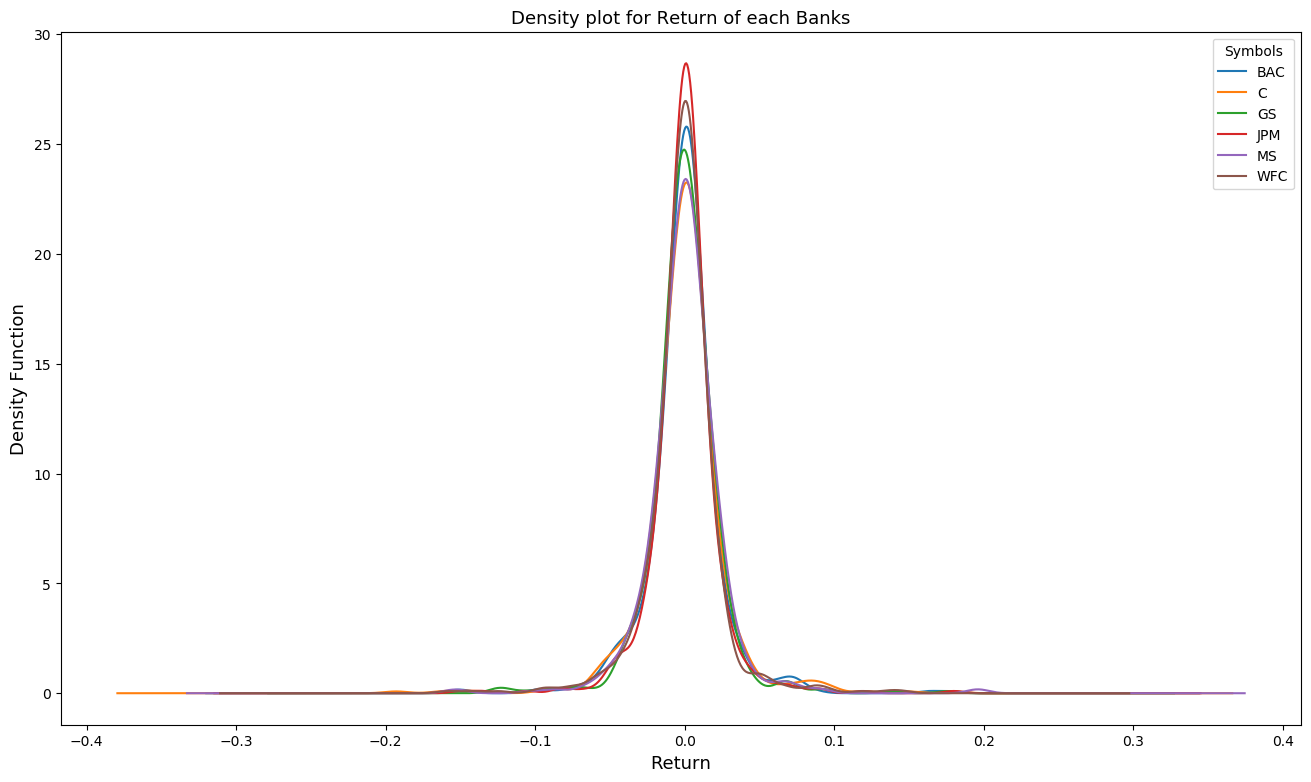

In [270]:
returns.plot.kde(figsize=(16,9))
plt.ylabel("Density Function", fontsize =13)
plt.xlabel("Return", fontsize =13)
plt.title("Density plot for Return of each Banks", fontsize =13)

All these banks have nearly identical return distributions - slightly above 0. JP Morgan and Bank of America shows higher density of probabilities around slightly higher return. But it's questionable if this is statistically meaningful. Given the shape of graph and distribution, no statistical difference in returns is expected. 

This can be further explored and confirmed through T-test for return and F-test for Risk.

### Moving Averages

30 day Moving averages for these stocks in the observation period

In [144]:
RollingAVG = df['Adj Close'].rolling(30, win_type ='triang').mean()

Plotting the rolling 30 day average against the Close Price for Bank Of America's stock for the observation period

In [255]:
df_MA = pd.merge(df['Adj Close'],RollingAVG,on='Date', how='left')

Symbols,BAC_x,C_x,GS_x,JPM_x,MS_x,WFC_x,BAC_y,C_y,GS_y,JPM_y,MS_y,WFC_y
Date,,,,,,,,,,,,
2018-01-02,28.327543,69.533264,244.074509,99.667267,48.864182,55.337929,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,28.232800,69.748337,241.802444,99.768829,48.995262,55.763680,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-04,28.602287,70.608627,245.181931,101.198090,49.744282,56.461178,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-05,28.734924,70.515114,243.931305,100.548431,49.725548,56.841637,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-08,28.535971,69.692230,240.389572,100.696907,49.519577,56.198483,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-24,23.809999,50.810001,198.020004,93.746490,46.950001,26.120001,25.355045,52.069156,203.461979,100.897955,46.024823,28.158089
2020-06-25,24.719999,52.680000,207.100006,97.014641,48.790001,27.370001,25.488934,52.533911,204.582512,101.407000,46.395622,28.350933
2020-06-26,23.150000,49.580002,189.190002,91.696457,47.049999,25.340000,25.579867,52.900667,205.429846,101.753289,46.709089,28.489378


In [258]:
Closing =df_MA.rename(columns={"BAC_x": "BAC_AdjClosing", "BAC_y": "BAC_30Rolling", "C_x": "C_AdjClosing", "C_y": "C_30Rolling", "GS_x": "GS_AdjClosing", "GS_y": "GS_30Rolling", "JPM_x": "JPM_AdjClosing", "JPM_y": "JPM_30Rolling", "MS_x": "MS_AdjClosing", "MS_y": "MS_30Rolling", "WFC_x": "WFC_AdjClosing", "WFC_y": "WFC_30Rolling"})
Closing

Symbols,BAC_AdjClosing,C_AdjClosing,GS_AdjClosing,JPM_AdjClosing,MS_AdjClosing,WFC_AdjClosing,BAC_30Rolling,C_30Rolling,GS_30Rolling,JPM_30Rolling,MS_30Rolling,WFC_30Rolling
Date,,,,,,,,,,,,
2018-01-02,28.327543,69.533264,244.074509,99.667267,48.864182,55.337929,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,28.232800,69.748337,241.802444,99.768829,48.995262,55.763680,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-04,28.602287,70.608627,245.181931,101.198090,49.744282,56.461178,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-05,28.734924,70.515114,243.931305,100.548431,49.725548,56.841637,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-08,28.535971,69.692230,240.389572,100.696907,49.519577,56.198483,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-24,23.809999,50.810001,198.020004,93.746490,46.950001,26.120001,25.355045,52.069156,203.461979,100.897955,46.024823,28.158089
2020-06-25,24.719999,52.680000,207.100006,97.014641,48.790001,27.370001,25.488934,52.533911,204.582512,101.407000,46.395622,28.350933
2020-06-26,23.150000,49.580002,189.190002,91.696457,47.049999,25.340000,25.579867,52.900667,205.429846,101.753289,46.709089,28.489378


#### BAC

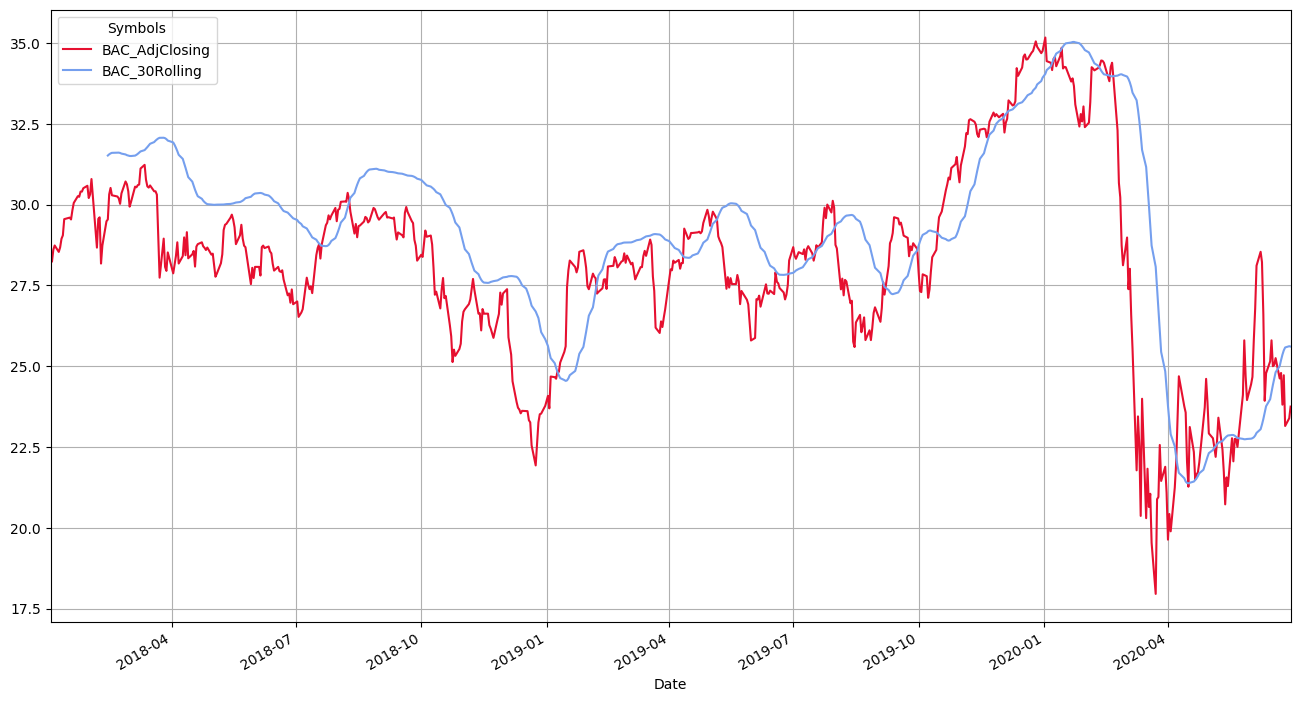

In [259]:
Closing.plot(y = ['BAC_AdjClosing', "BAC_30Rolling"], figsize = (16,9), grid=True, color =['#e61030', '#759FEE'])

#### Citi Bank

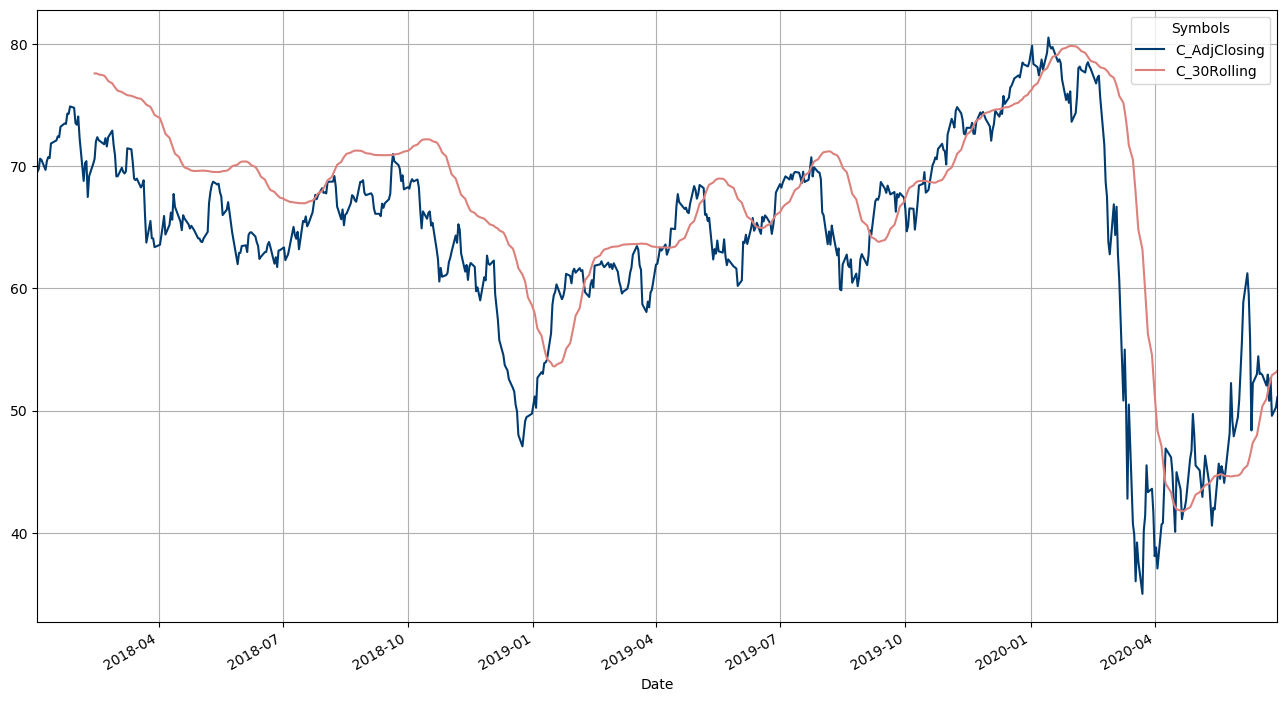

In [260]:
Closing.plot(y = ['C_AdjClosing', "C_30Rolling"], figsize = (16,9), grid=True, color =['#003b70', '#DC817C'])

#### Goldman Sachs

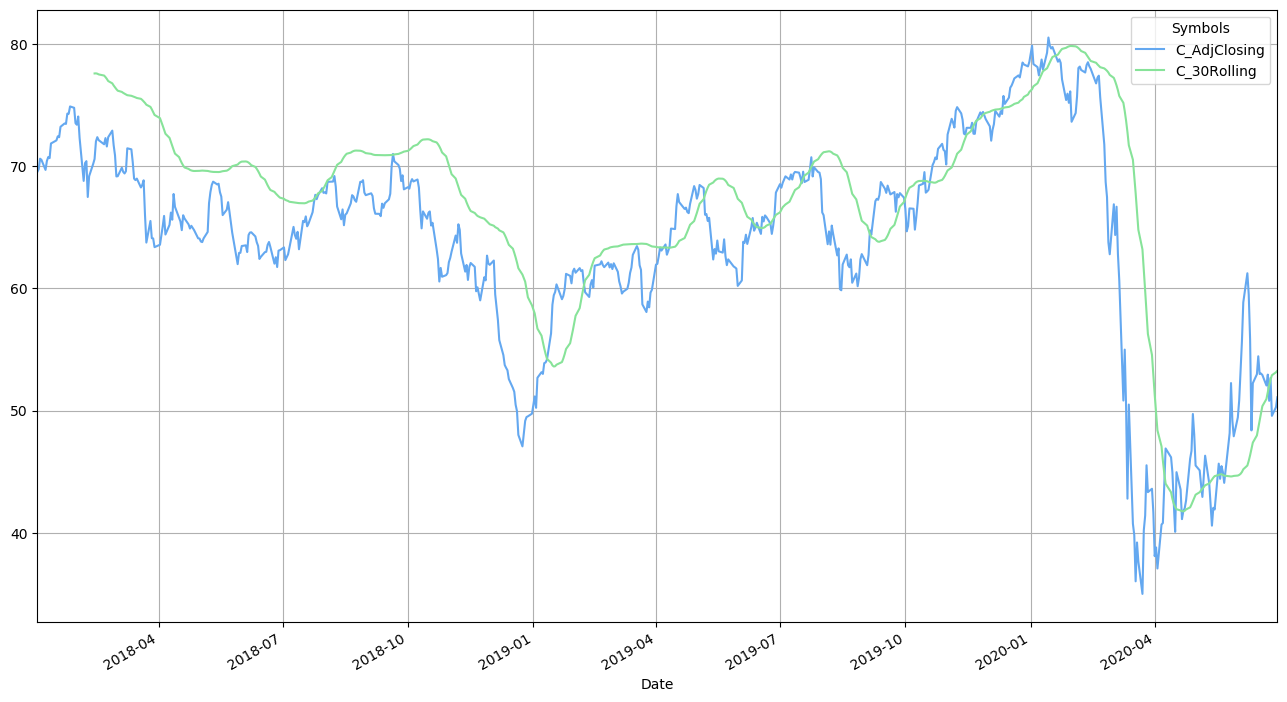

In [261]:
Closing.plot(y = ['C_AdjClosing', "C_30Rolling"], figsize = (16,9), grid=True, color =['#64A8F0', '#87E399']) 

#### JP Morgan

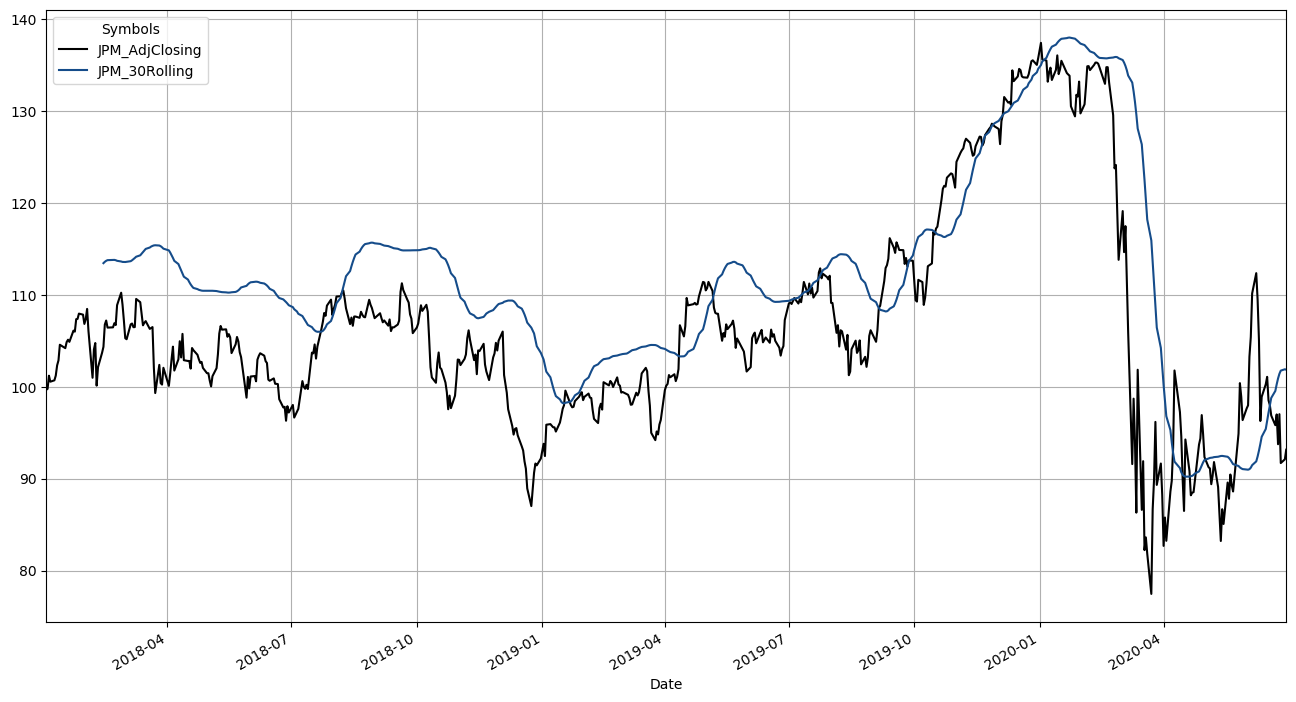

In [262]:
Closing.plot(y = ['JPM_AdjClosing', "JPM_30Rolling"], figsize = (16,9), grid=True, color =['#000000', '#154C8A'])

#### Morgan Stanley

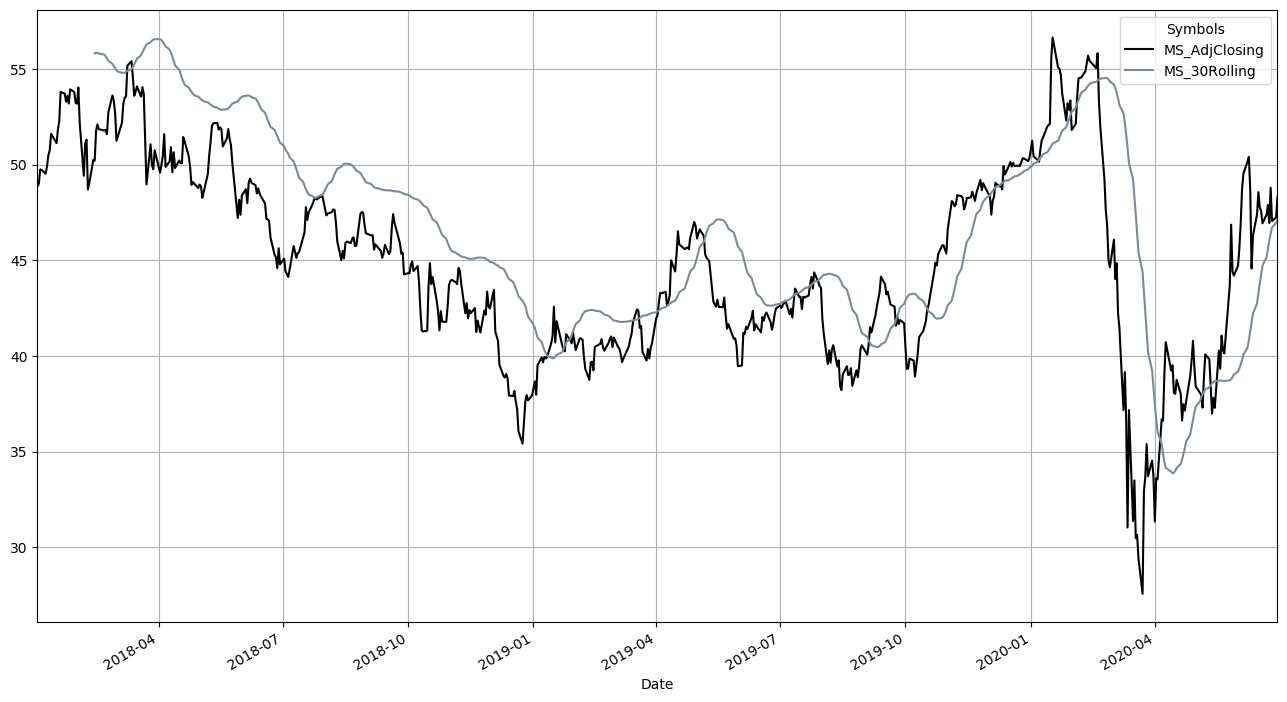

In [263]:
Closing.plot(y = ['MS_AdjClosing', "MS_30Rolling"], figsize = (16,9), grid=True, color =['#000000', '#7C8A97'])

#### Wellsfargo

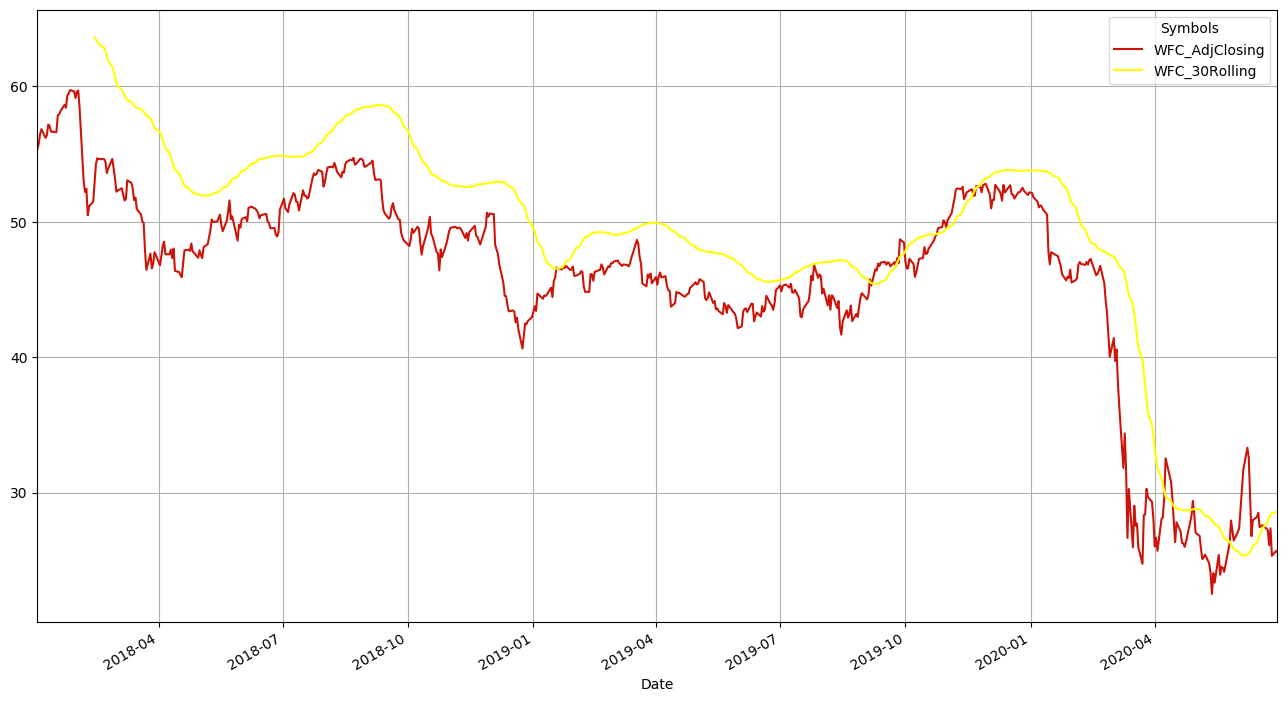

In [264]:
Closing.plot(y = ['WFC_AdjClosing', "WFC_30Rolling"], figsize = (16,9), grid=True, color =['#cd1409', '#ffff00'])

Plotted individually, all the banks except Wellsfargo shows almost identical movement in terms of direction and amplitude. Wellsfargo looks like it is not too different from other banks in terms of overall price change direction especially in dips and in general it showed smaller amplitude in fluctuation. However, in the long trend line, WFC stock has been bearish and it does not seem to recover from the shock in Feb/March 2020.

This has to be further examined with proper analysis to identify the reason why, but my initial thought is because Federal Reserve enacted penalty on Wellsfargo in the beginning of 2018 for WellsFargo's questionable practice in sales and essentially stopped it from growing growing any larger than its total assets at the end of 2017 until the bank makes "sufficient improvements." and its negatively impacting WellsFargo's long term business.  

Also given that Feb/Mar 2020 was a bad quarter for global stock market including the 6 stocks here from Covid-19 shock, WellsFargo seems to have been handle it poorly than other banks which are slowly making come back from it.

As time permits, this can be further researched in the next steps.

#### All stock With and Without Goldman Sachs

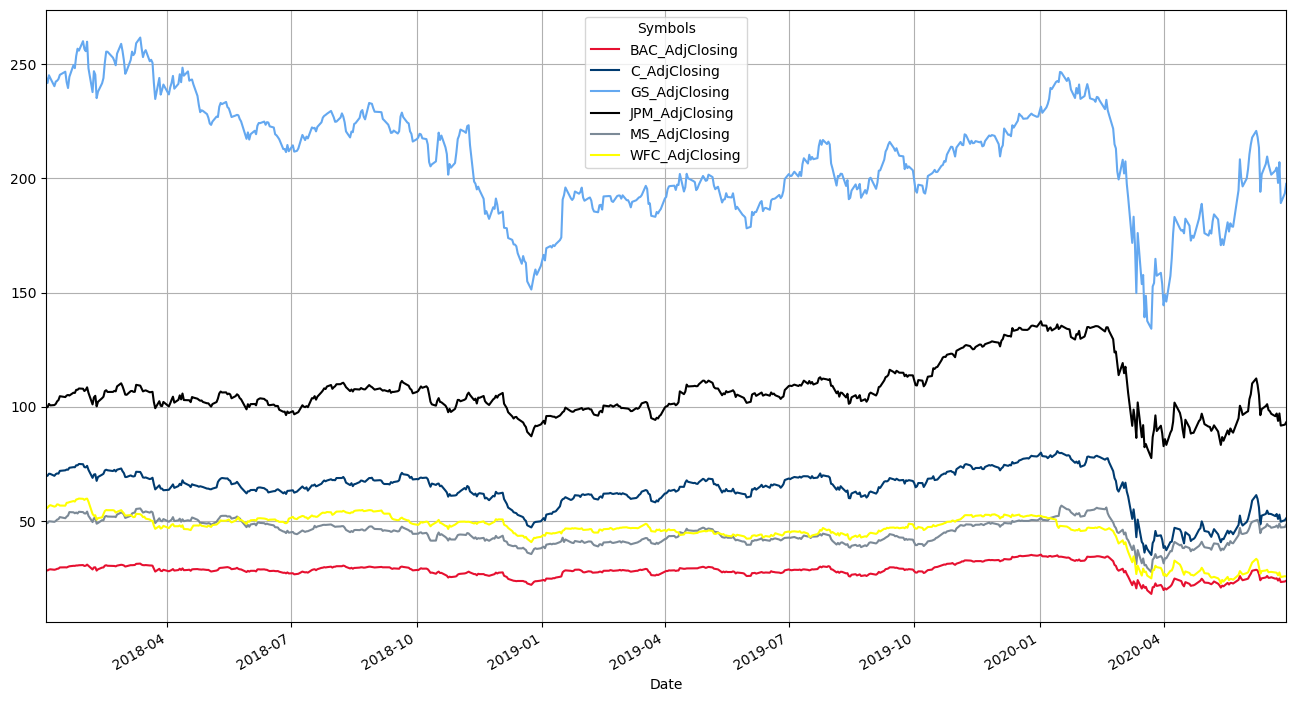

In [265]:
Closing.plot(y = ['BAC_AdjClosing', 'C_AdjClosing', 'GS_AdjClosing', 'JPM_AdjClosing', 'MS_AdjClosing', 'WFC_AdjClosing'], figsize = (16,9), grid=True, color =['#e61030', '#003b70', '#64A8F0', '#000000', '#7C8A97', '#ffff00'])

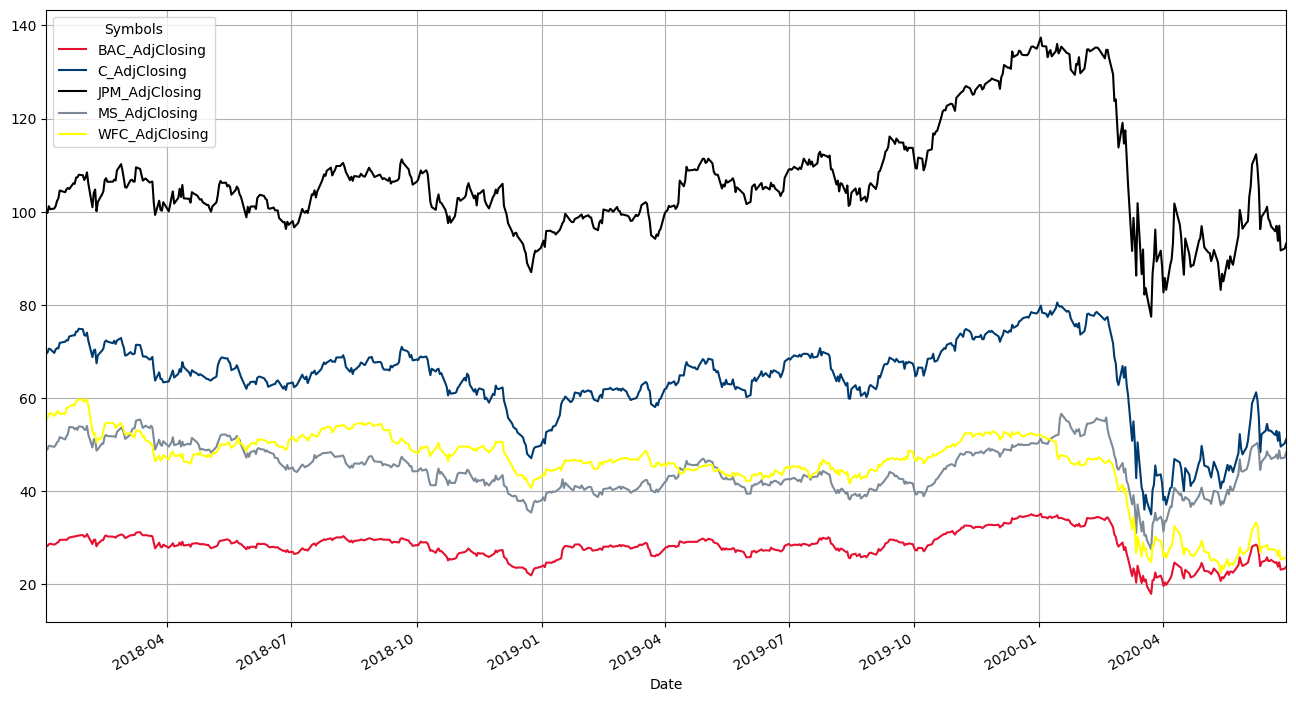

In [266]:
Closing.plot(y = ['BAC_AdjClosing', 'C_AdjClosing', 'JPM_AdjClosing', 'MS_AdjClosing', 'WFC_AdjClosing'], figsize = (16,9), grid=True, color =['#e61030', '#003b70', '#000000', '#7C8A97', '#ffff00'])

Overall, on high level, those target stocks shows similar trend patterns. 
WellsFargo(in Yellow) demonstrates slightly unique patterns from time to time and also its price got tanked after covid shock and not on recovering trend unlike other stocks. So I expectslighly slower correaltion stat for Wellsfargo against the rest banks. 

We can quickly observe how correlated they are by estimating their correlation as below.

### Correlation heatmap between the stocks Close Price

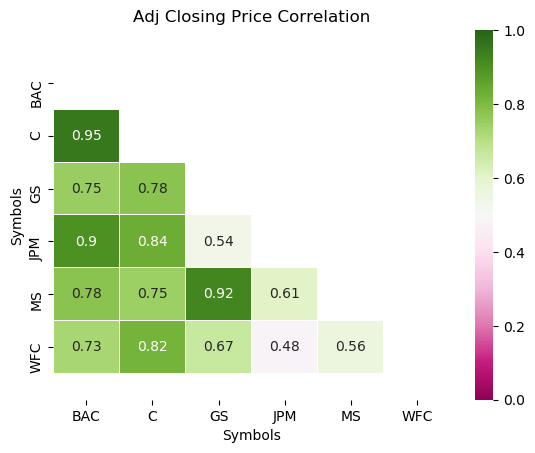

In [267]:
import seaborn as sns

corr_close = df['Adj Close'].corr()
mask = np.triu(np.ones_like(corr_close, dtype=np.bool))

ax = sns.heatmap(
    corr_close,
    vmin=0, vmax=1, center=0.5,
    annot=True,
    #square=True,
    cmap="PiYG",
    mask = mask,
    linewidth=0.005,
)

bottom, top = ax.get_ylim()
ax.set_title('Adj Closing Price Correlation')
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()

* Bank of America & Citi : 0.95
* Morgan Stanley & Goldman Sachs : 0.92
* JP Morgan & Bank of America : 0.90

are the most highly correlated in terms of Closing price.

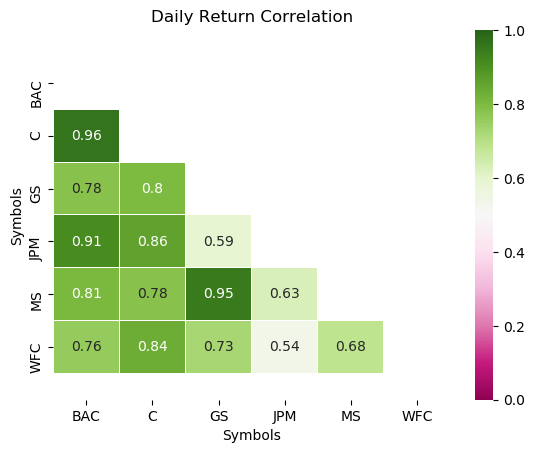

In [268]:
corr_return = returns.corr()

mask = np.triu(np.ones_like(corr_close, dtype=np.bool))

ax = sns.heatmap(
    corr_Rolling,
    vmin=0, vmax=1, center=0.5,
    annot=True,
    #square=True,
    cmap="PiYG",
    mask = mask,
    linewidth=0.005,
)

bottom, top = ax.get_ylim()
ax.set_title('Daily Return Correlation')
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()

* Bank of America & Citi : 0.96
* Morgan Stanley & Goldman Sachs : 0.95
* JP Morgan & Bank of America : 0.91

are the most highly correlated in terms of Each Day Return.

# Moving on

This was a simple project focusing on EDA to visualize and explorer data.

As time permits, I'll update the analysis with detailed interpretation and required statistical analysis